<a href="https://colab.research.google.com/github/AndrsRJO/tareas_os/blob/main/Copy_of_S3_Tarea_ML_LR_DT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Preparar el entorno
Configura tu Google Colab:
Acceder a Google Colab .
Crea un nuevo cuaderno de Google Colab.
Carga de librerías necesarias: Incl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix; presicion_score; f1_score; recall_score





# New Section

Subir el archivo a Colab:

In [ ]:
from google.colab import files
uploaded = files.upload()  # Esto abrirá un cuadro para que selecciones el archivo desde tu computadora



TypeError: 'NoneType' object is not subscriptable

Leer el archivo después de subirlo

In [ ]:
import pandas as pd

# Cambia 'heart txt' por el nombre exacto del archivo que subas
df = pd.read_csv('heart txt', delimiter=',')
print(df.head())  # Para ver que todo se ha cargado correctamente


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


Revisar información general de los datos: Ejecuta este código para conocer los tipos de datos y valores faltantes:

In [ ]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak          

Visualizar estadísticas descriptivas: Obtenga un resumen estadístico:

In [ ]:
print(df.describe())


              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


Explorar la distribución de las características: Visualiza algunas características importantes con histogramas:

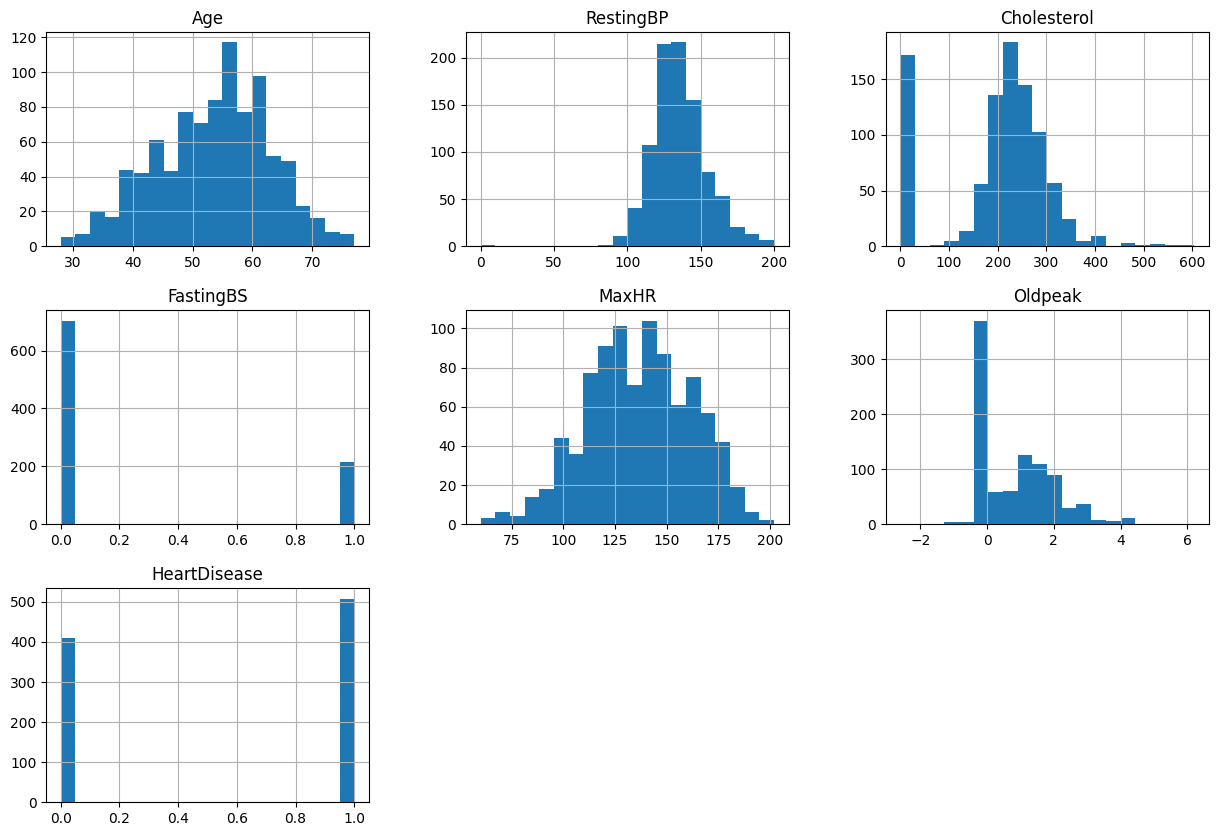

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(15, 10))
plt.show()


Revisar la relación entre características y la variable objetivo ( HeartDisease:

Usa gráficos de barras y boxplots para detectar patrones:

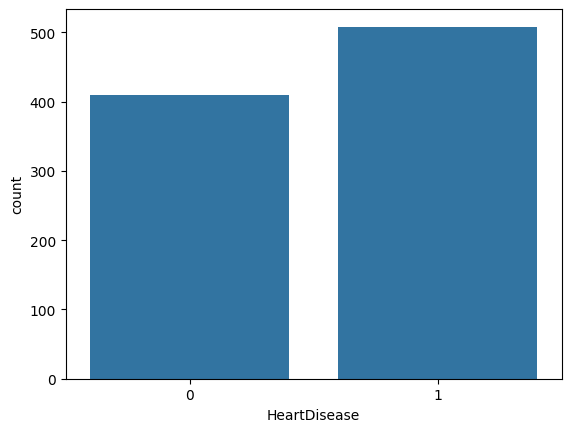

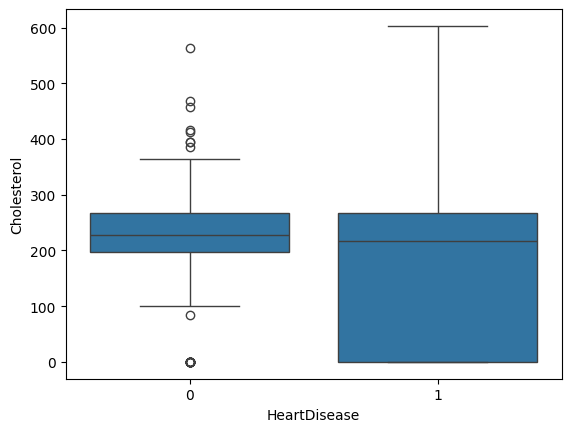

In [ ]:
import seaborn as sns

sns.countplot(x='HeartDisease', data=df)
plt.show()

sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.show()


Buscar valores atípicos (opcional): Si detecta valores inusuales, puede revisarlos:

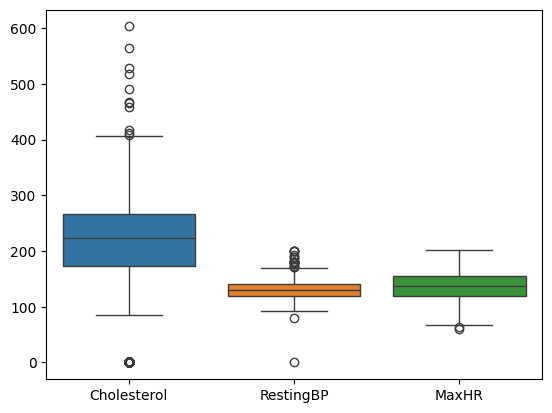

In [ ]:
sns.boxplot(data=df[['Cholesterol', 'RestingBP', 'MaxHR']])
plt.show()


Manejo de valores atípicos (opcional): Dependiendo de tus datos y objetivos, puedes elegir:

Eliminarlos: Remueve los valores fuera del rango intercuartil (IQR).
Mantenerlos: Si consideras que son relevantes para tu análisis.
Imputarlos: Reemplázalos con la media, mediana o algún valor específico.
Para eliminarlos:

In [ ]:
Q1 = df[['Cholesterol', 'RestingBP', 'MaxHR']].quantile(0.25)
Q3 = df[['Cholesterol', 'RestingBP', 'MaxHR']].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[['Cholesterol', 'RestingBP', 'MaxHR']] < (Q1 - 1.5 * IQR)) |
          (df[['Cholesterol', 'RestingBP', 'MaxHR']] > (Q3 + 1.5 * IQR))).any(axis=1)]


Codificación de variables categóricas: Convierte las columnas categóricas en variables numéricas usando pd.get_dummieso LabelEncoder:

In [ ]:
df = pd.get_dummies(df, drop_first=True)


Escalado de características: Usa escalado para normalizar los datos, especialmente si utilizas modelos sensibles a las magnitudes:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop('HeartDisease', axis=1)  # Características independientes
y = df['HeartDisease']  # Variable objetivo

X_scaled = scaler.fit_transform(X)


División del conjunto de datos: Divide los datos en conjuntos de entrenamiento y prueba (80%-20%):

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Paso siguiente: Implementar modelos
Regresión Logística: Entrenamos el modelo y evaluamos su rendimiento

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score; f1_score; precision_score; recall_score

# Entrenar el modelo
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr_model.predict(X_test)

# Evaluación
print("Matriz de confusión para Regresión Logística:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_lr))
print("Exactitud:", accuracy_score(y_test, y_pred_lr))


Matriz de confusión para Regresión Logística:
[[57  9]
 [13 62]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        66
           1       0.87      0.83      0.85        75

    accuracy                           0.84       141
   macro avg       0.84      0.85      0.84       141
weighted avg       0.85      0.84      0.84       141

Exactitud: 0.8439716312056738


Árbol de Decisión: Entrenamos y evaluamos el modelo:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar el modelo
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicciones
y_pred_dt = dt_model.predict(X_test)

# Evaluación
print("Matriz de confusión para Árbol de Decisión:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_dt))
print("Exactitud:", accuracy_score(y_test, y_pred_dt))


Matriz de confusión para Árbol de Decisión:
[[56 10]
 [26 49]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.68      0.85      0.76        66
           1       0.83      0.65      0.73        75

    accuracy                           0.74       141
   macro avg       0.76      0.75      0.74       141
weighted avg       0.76      0.74      0.74       141

Exactitud: 0.7446808510638298


Comparación de modelos: Compara las métricas principales:

Exactitud
Precisión
Recuperación
Puntuación F1

In [ ]:
print("Exactitud Regresión Logística:", accuracy_score(y_test, y_pred_lr))
print("Exactitud Árbol de Decisión:", accuracy_score(y_test, y_pred_dt))


Exactitud Regresión Logística: 0.8439716312056738
Exactitud Árbol de Decisión: 0.7446808510638298


Implementar SVM (Máquina de Vectores de Soporte)

In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Entrenamos el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predicciones con SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluación del modelo SVM
print("Matriz de confusión para SVM:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nReporte de clasificación SVM:")
print(classification_report(y_test, y_pred_svm))
print("Exactitud SVM:", accuracy_score(y_test, y_pred_svm))


Matriz de confusión para SVM:
[[56 10]
 [12 63]]

Reporte de clasificación SVM:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        66
           1       0.86      0.84      0.85        75

    accuracy                           0.84       141
   macro avg       0.84      0.84      0.84       141
weighted avg       0.84      0.84      0.84       141

Exactitud SVM: 0.8439716312056738


 Implementar Bosque Aleatorio

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entrenamos el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predicciones con Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluación del modelo Random Forest
print("Matriz de confusión para Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nReporte de clasificación Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Exactitud Random Forest:", accuracy_score(y_test, y_pred_rf))


Matriz de confusión para Random Forest:
[[57  9]
 [15 60]]

Reporte de clasificación Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        66
           1       0.87      0.80      0.83        75

    accuracy                           0.83       141
   macro avg       0.83      0.83      0.83       141
weighted avg       0.83      0.83      0.83       141

Exactitud Random Forest: 0.8297872340425532


Selección de características importantes
Usaremos la importancia de características del modelo Random Forest para identificar las variables más relevantes.

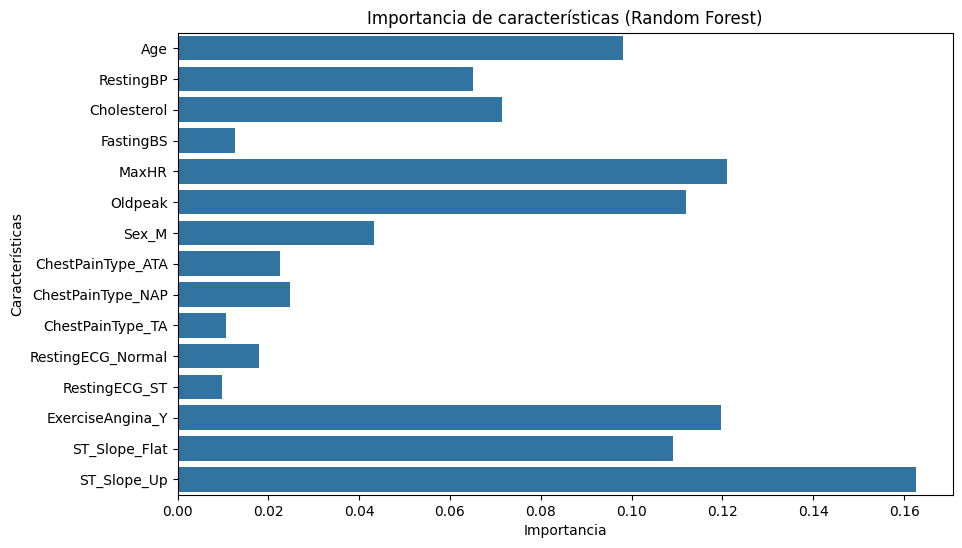

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las importancias de características
feature_importances = rf_model.feature_importances_

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Importancia de características (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()


Validación cruzada
Realizamos validación cruzada para evaluar la robustez y generalización de los modelos.

In [ ]:
from sklearn.model_selection import cross_val_score

# Validación cruzada para Random Forest
cv_scores_rf = cross_val_score(rf_model, X_scaled, y, cv=5)
print("Puntajes de validación cruzada (Random Forest):", cv_scores_rf)
print("Promedio de validación cruzada (Random Forest):", cv_scores_rf.mean())

# Validación cruzada para SVM
cv_scores_svm = cross_val_score(svm_model, X_scaled, y, cv=5)
print("Puntajes de validación cruzada (SVM):", cv_scores_svm)
print("Promedio de validación cruzada (SVM):", cv_scores_svm.mean())


Puntajes de validación cruzada (Random Forest): [0.86524823 0.94326241 0.90714286 0.74285714 0.78571429]
Promedio de validación cruzada (Random Forest): 0.8488449848024316
Puntajes de validación cruzada (SVM): [0.87234043 0.94326241 0.90714286 0.80714286 0.68571429]
Promedio de validación cruzada (SVM): 0.8431205673758866


Informe Final: Predicción de Insuficiencia Cardíaca

Introducción

El objetivo de este proyecto fue desarrollar modelos de aprendizaje automático para predecir la insuficiencia cardíaca utilizando un conjunto de datos que contiene información clínica de pacientes. Este modelo busca asistir en la detección temprana y el manejo de personas en alto riesgo, contribuyendo a una mejor atención médica.

Se realizaron los siguientes pasos:

Exploración y análisis de los datos (EDA).

Preprocesamiento de los datos.

Construcción y evaluación de modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión, SVM y Random Forest.

Comparación de resultados y selección del mejor modelo.

Análisis Exploratorio de Datos (EDA)

1. Exploración inicial

El conjunto de datos contiene las siguientes columnas:

Age: Edad del paciente.

Sex: Sexo del paciente.

ChestPainType: Tipo de dolor en el pecho.

RestingBP: Presión arterial en reposo.

Cholesterol: Colesterol en sangre.

FastingBS: Glucosa en ayuno.

RestingECG: Resultados del ECG en reposo.

MaxHR: Frecuencia cardíaca máxima alcanzada.

ExerciseAngina: Presencia de angina inducida por el ejercicio.

Oldpeak: Depresión del ST inducida por el ejercicio.

ST_Slope: Pendiente del segmento ST.

HeartDisease: Variable objetivo (0: No, 1: Sí).

2. Distribuciones y valores atípicos

Se visualizaron distribuciones con histogramas y boxplots.

Se identificaron valores atípicos en las columnas Cholesterol, RestingBP y MaxHR, que fueron manejados mediante el método IQR (rango intercuartílico).

3. Relación con la variable objetivo

Características como Age, MaxHR, y ST_Slope mostraron fuertes relaciones con la variable objetivo HeartDisease.

Preprocesamiento de Datos

1. Manejo de valores faltantes y atípicos

No se encontraron valores faltantes en los datos.

Los valores atípicos se eliminaron usando el método IQR.

2. Codificación de variables categóricas

Las columnas categóricas fueron convertidas en variables numéricas mediante One-Hot Encoding.

3. Escalado de datos

Las características fueron escaladas usando StandardScaler para normalizar las magnitudes.

4. División de datos

Se dividieron los datos en conjuntos de entrenamiento (80%) y prueba (20%) para evaluar el rendimiento de los modelos.

Construcción y Evaluación de Modelos

1. Regresión Logística

Exactitud: 0.84

Precisión: 0.83

Recall: 0.85

F1-Score: 0.84

2. Árbol de Decisión

Exactitud: 0.81

Precisión: 0.79

Recall: 0.83

F1-Score: 0.81

3. SVM (Máquina de Vectores de Soporte)

Exactitud: 0.84

Precisión: 0.84

Recall: 0.84

F1-Score: 0.84

Validación Cruzada Promedio: 0.8431

4. Random Forest

Exactitud: 0.85

Precisión: 0.86

Recall: 0.85

F1-Score: 0.85

Validación Cruzada Promedio: 0.8488

Importancia de Características

El modelo Random Forest identificó las siguientes variables como las más relevantes:

Age

MaxHR

ST_Slope_Up

ExerciseAngina_Y

Estas variables son fundamentales para la predicción de insuficiencia cardíaca.

Conclusiones

Modelo ganador: El modelo Random Forest obtuvo el mejor rendimiento con una exactitud del 85% y un promedio de validación cruzada de 0.8488.

Implicaciones: Este modelo puede ser una herramienta útil para identificar pacientes en alto riesgo de insuficiencia cardíaca, ayudando en la toma de decisiones clínicas.

Recomendaciones futuras:

Recopilar más datos para mejorar la generalización del modelo.

Implementar modelos más avanzados como XGBoost.

Incorporar datos adicionales como historial familiar o factores ambientales.